# 02 - Taller Keras Convnets (CNN's)

## Convnets 2D

Base de datos MNIST

* Leer y normalizar datos

In [48]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

* Formato de los datos, tensor tamaño 4

(batch_size, image_height, image_width, image_channels)

In [49]:
# MNIST sollo un canal

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255


* valores de etiquetas a categoricas (one hot encoding)

In [50]:
train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

### Extracción de características

In [51]:
from keras import layers
from keras import models
convNN = models.Sequential()

keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)

* filters:  número de filtros de convolución 

* kernel_size: dimsnsiones (renglones y columnas) de los filtros H^{(i)}

* strides: paso de convolución en cada dimensión.

* padding: {“valid”, “same”} indica si el resultado tendrá los mismos (num_renglones, num_columnas) 

* activation: función de activación.

* data_format: {“channels_last”, “channels_first”} indica si los datos de estradad estan en formato

(batch_size, image_height, image_width, image_channels)

o

(batch_size, image_channels, image_height, image_width)

In [52]:
convNN.add(layers.Conv2D(filters     =32,           # Número de filtros
                         kernel_size =(3, 3),       # tamaño del filtro
                         activation  ='relu',       # función de activación
                         input_shape =(28, 28, 1))) # Canales de entrada

ver: https://keras.io/layers/convolutional/

**Polling**: resalta información relevante de la capa de salida de la convolución

keras.layers.MaxPooling2D(pool_size=(2, 2),
                          strides=None,
                          padding='valid', 
                          data_format=None)

* pool_size:  dimensiones de la ventana 


In [53]:
convNN.add(layers.MaxPooling2D(pool_size=(2, 2)))

* Añadiendo más capas de convolución

In [54]:
convNN.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
convNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
convNN.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

* Arquitectura

In [55]:
convNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


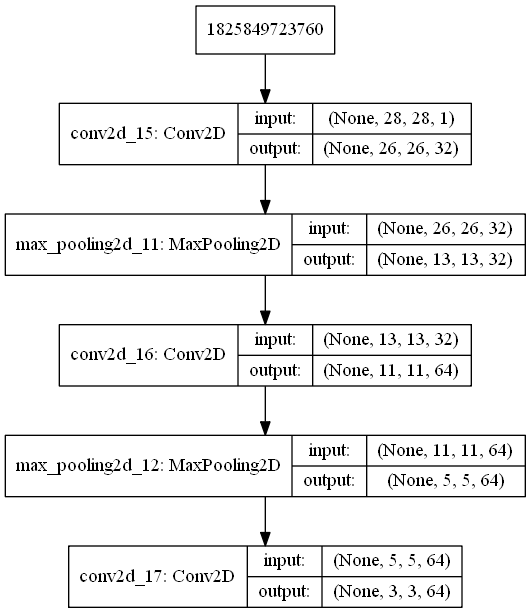

In [56]:
from keras.utils import plot_model
from IPython.display import Image

plot_model(convNN, to_file='TALLER02.png',show_shapes=True, show_layer_names=True)
Image(retina=True, filename='TALLER02.png')

### Clasificación capa fully connected layer

* Alimentar con las características una red multicapa

**Flatten**: tensor de rasgos a un vector unidimensional

In [57]:
convNN.add(layers.Flatten())

* arquitectura similar al ejercicios de la NN's

In [58]:
convNN.add(layers.Dense(units=64, activation='relu'))
convNN.add(layers.Dense(units=10, activation='softmax'))
convNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                36928     
__________

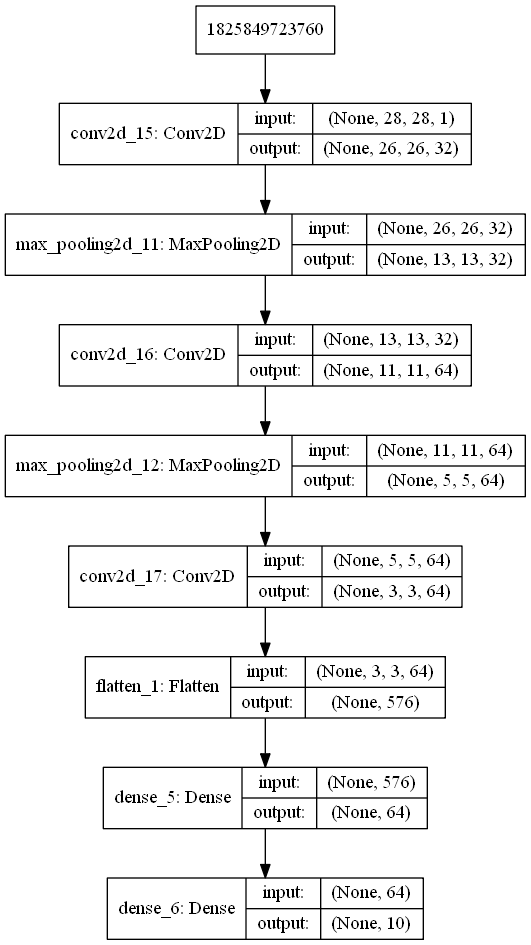

In [59]:
plot_model(convNN, to_file='TALLER02_1.png',show_shapes=True, show_layer_names=True)
Image(retina=True, filename='TALLER02_1.png')

* Compilar modelo

In [61]:
convNN.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


* Entrenamiento

In [62]:
import time
tic = time.time()

convNN.fit(x = train_images,  # Datos de entrenamiento
           y = train_labels,  # Etiquetas de entranamiento
           epochs    =5,      # Número de epocas
           batch_size=64,     # Tamaño de lote
           verbose=2)

print('seconds=', time.time()-tic)

W0823 00:37:27.643724  9056 deprecation.py:323] From C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0823 00:37:27.867254  9056 deprecation_wrapper.py:119] From C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/5
 - 34s - loss: 0.1716 - acc: 0.9472
Epoch 2/5
 - 13s - loss: 0.0465 - acc: 0.9857
Epoch 3/5
 - 12s - loss: 0.0324 - acc: 0.9897
Epoch 4/5
 - 12s - loss: 0.0237 - acc: 0.9927
Epoch 5/5
 - 14s - loss: 0.0193 - acc: 0.9944
seconds= 87.15575885772705


* Evaluando modelo

In [63]:
test_loss, test_acc = convNN.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 179us/step


In [64]:
print('Accuracy:' ,test_acc)

Accuracy: 0.9883


* matrix de confusión para este modelo.

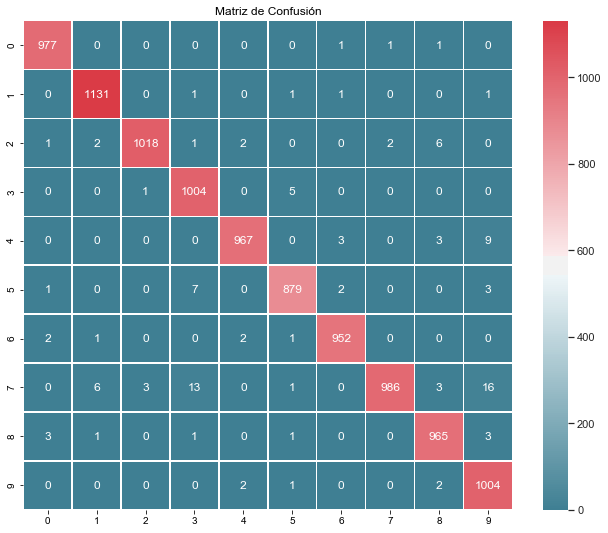

In [65]:
import numpy as np

test_predicted_labels = convNN.predict(test_images)
test_true_labels      = np.argmax(test_labels,axis=1)
test_predicted_labels = np.argmax(test_predicted_labels,axis=1)

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, precision_score, recall_score 
from sklearn.metrics import f1_score, cohen_kappa_score
import seaborn as sns 

C = confusion_matrix(test_true_labels, test_predicted_labels)

f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')
plt.show()



## Convnets 1D